# Multihead Attention Visualization
Parmis Vazifeh
400522292



The code aims to visualize the multi-head attention mechanism of a pre-trained BERT model:
1. Loads the BERT model and tokenizer.
2. List item
3. Encodes a sample sentence into tokenized input.
4. Passes the input through the BERT model and retrieves attention scores     for each layer.
5. Visualizes the attention maps for the first attention layer and all attention heads using heatmaps.
6. Displays these visualizations to show how each attention head focuses on different tokens in the sentence.

In [21]:
%pip install transformers torch matplotlib


In [4]:
import math
import torch
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel

In [29]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [30]:
sentence = "Sara looked at the mirror. She smiled."

In [31]:
encoded = tokenizer.encode_plus(
    sentence,
    return_tensors="pt",
    add_special_tokens=True
)

input_ids = encoded["input_ids"]

In [32]:
with torch.no_grad():
    outputs = model(
        input_ids,
        output_attentions=True,
        return_dict=True
    )

In [33]:
attentions = outputs.attentions
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

In [34]:
layer_index = 0
attn_layer = attentions[layer_index][0]
num_heads, seq_len, _ = attn_layer.shape


/tmp/ipython-input-3066702011.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


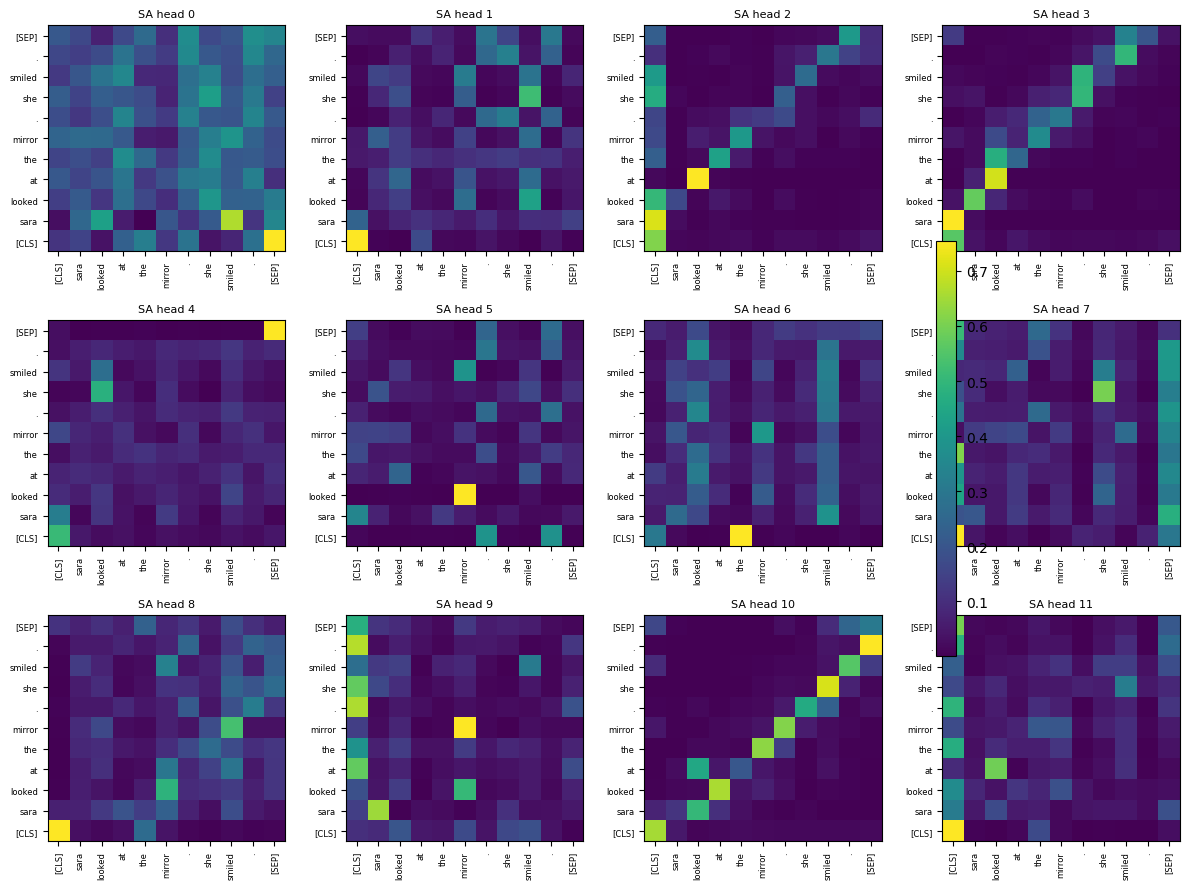

In [35]:
cols = 4
rows = math.ceil(num_heads / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

for i, ax in enumerate(axes.flat):
    if i < num_heads:
        head_attn = attn_layer[i].cpu().numpy()

        im = ax.imshow(head_attn,
                       origin="lower",
                       aspect="auto")

        ax.set_title(f"SA head {i}", fontsize=8)

        ax.set_xticks(range(seq_len))
        ax.set_yticks(range(seq_len))
        ax.set_xticklabels(tokens, rotation=90, fontsize=6)
        ax.set_yticklabels(tokens, fontsize=6)
    else:
        ax.axis("off")

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()

The competition between heads in multi-head attention is not a direct competition, but rather a parallel process where each head attends to different aspects of the input. This enables the model to capture more diverse and comprehensive information, which is then combined to produce the final output.

## Reference:


1. Visualize BERT attention [Video]. YouTube. https://www.youtube.com/watch?v=4PQyRJd9d_E  
2. Visualization of attention in the transformer model (Demonstrated on BERT) [Video]. YouTube. https://www.youtube.com/watch?v=umErGRrfSk4
YouTube

